<a href="https://colab.research.google.com/github/reply2vikas/Project-1/blob/master/Assignment_3_1st_DNN-VK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
#Import necessary libraries and Installing packages
# https://keras.io/

!pip install -q keras
import keras

In [0]:
#Importing necessary libraries and packages from Keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#Loading the dataset
#load_data() returns two tuples of Numpy arrays. The first tuple represents the training x-y pairs while the second
#tuple represents the testing x-y pairs.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


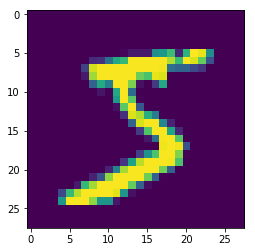

In [40]:
#Printing the Mnist image with shape (It is a tuple of integers that describe how many dimensions the tensor has
#along each axis. In the Numpy library this attribute is called shape.)
#Importing the pyplot package to show the Mnist image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Reshapping the data (Verifing that x_train.shape takes the form of (60000, 784) and x_test.shape takes the
#form of (10000, 784), where the first dimension indexes the image and the second indexes the pixel in each 
#image now the intensity of the pixel is a value between 0 and 1))

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#These MNIST images of 28×28 pixels are represented as an array of numbers whose values range from [0, 255] 
#of type uint8. But it is usual to scale the input values of neural networks to certain ranges. Here the input values 
#should be scaled to values of type float32 within the interval [0, 1]. We can achieve this transformation with the
#following lines of code:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [43]:
#To see the effect of the transformation we can see the values before and after applying to_categorical:-

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# In this example we will use what is known as one-hot encoding, which we have already mentioned, which consists
# of transforming the labels into a vector of as many zeros as the number of different labels, and containing the 
# value of 1 in the index that corresponds to the value of the label. Keras offers many support functions, including 
# to_categorical to perform precisely this transformation, which we can import from keras.utils-

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [45]:
#Now we will do data ready to be used in our simple model example that we are going to program in Keras in the 
#next section.

Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
#Defining the Model
#Importing Activation and MaxPooling2D methos from Library/Package Keras

# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 10))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [47]:
#A very useful method that Keras provides to check the architecture of our model is summary()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 16)        1040      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 10)        330       
__________

In [0]:
#Configuration of the learning process
#we are specify the following arguments in compile() method to test it on our computer:

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [49]:
#Model training

model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/30
60000/60000 [==============================] - 12s 207us/step - loss: 0.3479 - acc: 0.9478
Epoch 2/30
60000/60000 [==============================] - 12s 204us/step - loss: 0.1393 - acc: 0.9742
Epoch 3/30
60000/60000 [==============================] - 12s 200us/step - loss: 0.0964 - acc: 0.9801
Epoch 4/30
60000/60000 [==============================] - 12s 207us/step - loss: 0.0728 - acc: 0.9842
Epoch 5/30
60000/60000 [==============================] - 12s 196us/step - loss: 0.0607 - acc: 0.9858
Epoch 6/30
60000/60000 [==============================] - 12s 198us/step - loss: 0.0524 - acc: 0.9871
Epoch 7/30
60000/60000 [==============================] - 13s 212us/step - loss: 0.0453 - acc: 0.9892
Epoch 8/30
60000/60000 [==============================] - 12s 195us/step - loss: 0.0371 - acc: 0.9913
Epoch 9/30
60000/60000 [==============================] - 13s 209us/step - loss: 0.0350 - acc: 0.9913
Epoch 10/30
60000/60000 [==============================] - 12s 196us/step - loss: 

In [0]:
#Model evaluation

score = model.evaluate(X_test, Y_test, verbose=0)

In [51]:
print(score)

[0.03112751807420864, 0.9914]


In [0]:
y_pred = model.predict(X_test)

In [31]:
print(y_pred[:9])
print(y_test[:9])

[[4.2182076e-08 9.0888250e-08 1.8397475e-07 5.7307710e-09 2.2240128e-07
  2.5765523e-08 1.1779297e-08 9.9999940e-01 4.2136358e-10 4.0867487e-09]
 [2.0523657e-08 1.3562897e-07 9.9999928e-01 5.9696305e-08 2.6316792e-11
  2.5393966e-14 4.8323972e-07 1.0541279e-09 3.3614861e-10 1.3980125e-08]
 [4.0337341e-08 9.9999559e-01 8.3587484e-09 9.8923572e-08 8.6860766e-08
  4.1161215e-06 8.7564356e-09 3.3511828e-08 9.4094321e-10 3.4885943e-09]
 [1.0000000e+00 3.8154173e-08 1.0482540e-09 4.4359147e-09 2.4419669e-10
  1.1446956e-09 3.7183561e-08 3.2517464e-10 6.0389973e-09 1.9079740e-11]
 [3.0556791e-07 2.3639730e-06 1.5365107e-09 8.8785669e-08 9.9999523e-01
  2.2762677e-08 9.4989456e-09 2.1819724e-10 1.7173522e-06 3.2024889e-07]
 [1.7897005e-07 9.9999964e-01 4.3465564e-09 2.3005590e-08 1.4454366e-08
  3.6542612e-08 1.6522231e-09 3.0025330e-08 1.1867490e-09 1.4025633e-09]
 [2.4634725e-10 8.2083701e-05 2.1113177e-08 5.8735367e-10 9.9924123e-01
  1.5849366e-08 6.2076180e-07 6.0811925e-11 6.7547103e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

    vis_img_in_filter()